US Stock Exchange Prediction - Explore the US market

Success in any financial market requires one to identify solid investments. When a stock or derivative is undervalued, it makes sense to buy. If it's overvalued, perhaps it's time to sell. While these finance decisions were historically made manually by professionals, technology has ushered in new opportunities for retail investors. Data scientists, specifically, may be interested in exploring quantitative trading, where decisions are executed programmatically based on predictions from trained models. This project will compare models against real future returns.

The project will involve building portfolios from the stocks eligible for predictions. Specifically, it ranks the stocks from highest to lowest expected returns and is evaluated on the difference in returns between the top and bottom 200 stocks.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
import os
import io
from datetime import datetime

In [2]:
# Data loading
data0 = pd.read_csv("a.us.txt")
data1 = pd.read_csv("aa.us.txt")
data2 = pd.read_csv("aaap.us.txt")
data3 = pd.read_csv("aaba.us.txt")
data4 = pd.read_csv("aac.us.txt")
data5 = pd.read_csv("aal.us.txt")
data6 = pd.read_csv("aamc.us.txt")
data7 = pd.read_csv("aame.us.txt")
data8 = pd.read_csv("aan.us.txt")
data9 = pd.read_csv("aaoi.us.txt")

In [3]:
# Check for the names of the columns
data0.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')

In [9]:
# I want to delete 'OpenInt' column as it does not have relevant information
del data0['OpenInt']
# All columns are type object
data0.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [7]:
# Changing 'Date' column to datetime type from object type
data0['Date'] = pd.to_datetime(data0.Date, format='%Y-%m-%d')
data0['Date'].dtypes

dtype('<M8[ns]')

In [8]:
data0.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1999-11-18,30.713,33.754,27.002,29.702,66277506,0
1,1999-11-19,28.986,29.027,26.872,27.257,16142920,0
2,1999-11-22,27.886,29.702,27.044,29.702,6970266,0
3,1999-11-23,28.688,29.446,27.002,27.002,6332082,0
4,1999-11-24,27.083,28.309,27.002,27.717,5132147,0


In [10]:
# Check for duplicated values
# There are no duplicate values
print(data0.duplicated().any())

False


In [11]:
# Check for null values
# There are no null values
print(data0.isnull().any())

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool


In [32]:
# Check for outliers in data
# Melt data frame into long format
data0_noDate = data0[['Open', 'High', 'Low', 'Close']]
df0_melted = pd.melt(data0_noDate)
df0_melted.head(10)

,variable,value
0,Open,30.713
1,Open,28.986
2,Open,27.886
3,Open,28.688
4,Open,27.083
5,Open,27.594
6,Open,27.676
7,Open,28.350
8,Open,28.480
9,Open,29.532


Text(0, 0.5, 'Values')

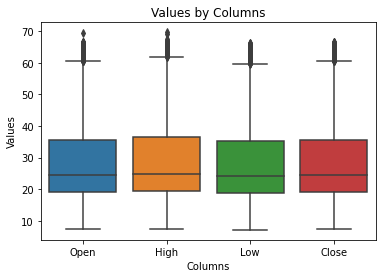

In [35]:
# Create seaborn boxplots by group
sns.boxplot(x='variable', y='value', data=df0_melted).set(title='Values by Columns')

# Modify axis labels
plt.xlabel('Columns')
plt.ylabel('Values')

There seems to be outliers in the higher range. 
In financial field, outliers represent volatility of stock market, which plays an important role in management, 
portfolio selection and derivative pricing. 
Therefore, forecasting outliers of stock market is of the great importance in theory and application.

In [16]:
data0.describe()

,Open,High,Low,Close,Volume
count,4468.000000,4468.000000,4468.000000,4468.000000,4.468000e+03
mean,27.303474,27.688036,26.924163,27.314216,4.015593e+06
std,11.924946,12.047579,11.786585,11.910049,2.669729e+06
min,7.223100,7.513900,7.087800,7.323800,0.000000e+00
25%,19.019250,19.337500,18.732000,18.983750,2.431308e+06
50%,24.352000,24.689500,24.053500,24.399000,3.481851e+06
75%,35.625000,36.370000,35.126000,35.653000,4.878584e+06
max,69.534000,69.705000,66.340000,66.620000,6.627751e+07
